<a href="https://ai4life-mdc24.grand-challenge.org/ai4life-mdc24/">
    <img src="https://rumc-gcorg-p-public.s3.amazonaws.com/b/756/denoising.x10.jpeg" height="200" />
</a>

# JUMP dataset

In [1]:
# Imports necessary to execute the code
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pooch
import tifffile
from careamics import CAREamist
from careamics.config import create_n2v_configuration

# use n2v2
use_n2v2 = False

# folder in which to save all the data
root = Path("jump")

## Import the dataset

In [2]:
# download the data using pooch
data_root = root / "data"
dataset_url = "https://zenodo.org/records/10912386/files/noisy.tiff"

file = pooch.retrieve(
    url=dataset_url,
    known_hash="394541cd10b5f10cc929e8083e42f757e47eb0a318cf78448a9e4622179c3069",
    path=data_root,
)

## Visualize data

Image shape: (517, 4, 540, 540)


Text(0.5, 1.0, 'Channel 4')

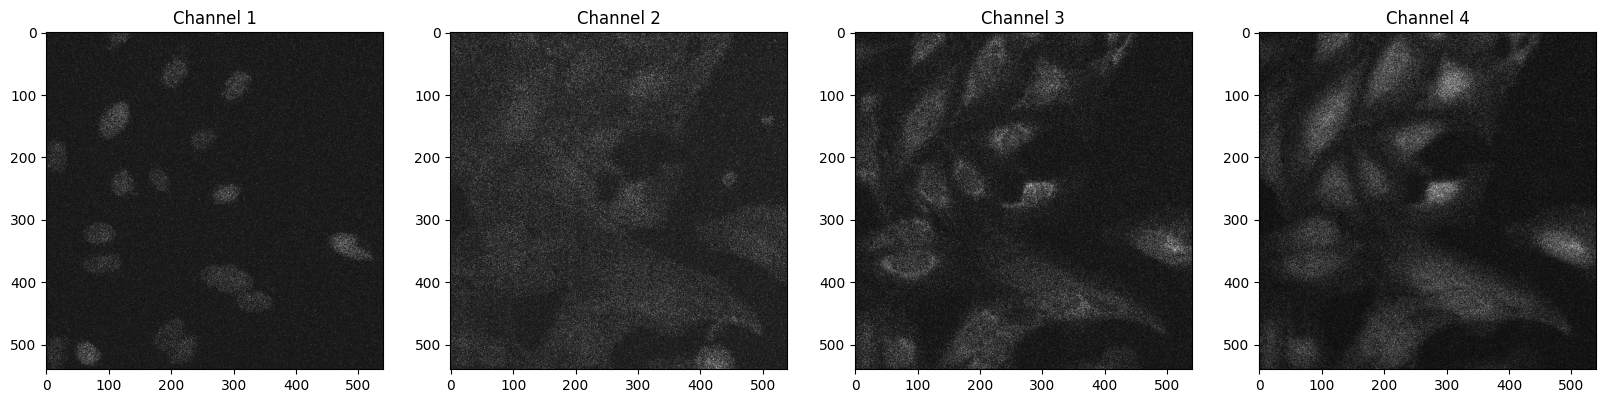

In [3]:
# load training and validation image and show them side by side
train_image = tifffile.imread(file)
print(f"Image shape: {train_image.shape}")

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(train_image[0][0], cmap="gray")
ax[0].set_title("Channel 1")
ax[1].imshow(train_image[0][1], cmap="gray")
ax[1].set_title("Channel 2")
ax[2].imshow(train_image[0][2], cmap="gray")
ax[2].set_title("Channel 3")
ax[3].imshow(train_image[0][3], cmap="gray")
ax[3].set_title("Channel 4")

## Train with CAREamics

### Create configuration


In [4]:
# create configuration
algo = "n2v2" if use_n2v2 else "n2v"

config = create_n2v_configuration(
    experiment_name="jump_" + algo,
    data_type="array",
    axes="SCYX",
    patch_size=(64, 64),
    batch_size=32,
    num_epochs=15,
    n_channels=4,
    use_n2v2=use_n2v2,
)

print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 2,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 4,
                                'independent_channels': True,
                                'n2v2': False,
                                'num_channels_init': 32,
                                'num_classes': 4},
                      'optimizer': {'name': 'Adam',
                                    'parameters': {'lr': 0.0001}}},
 'data_config': {'axes': 'SCYX',
                 'batch_size': 32,
                 'data_type': 'array',
                 'patch_size': [64, 64],
                 'transforms': [{'flip_x': True,
   

### Train

In [5]:
# instantiate a CAREamist
careamist = CAREamist(
    source=config,
    work_dir=root / algo,
)

# train
careamist.train(
    train_source=train_image,
    val_percentage=0.0,
    val_minimum_split=10,  # use 10 patches as validation
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA A40-16Q') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_f

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `float32` - serialized value may not be as expected
  Expected `float` but got `float32` - serialized value may not be as expected
  Expected `float` but got `float32` - serialized 

Epoch 0: 100%|███████| 1309/1309 [02:38<00:00,  8.27it/s, train_loss_step=0.586]
Validating: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 169.00it/s]
Epoch 1: 100%|█| 1309/1309 [02:38<00:00,  8.26it/s, train_loss_step=0.683, val_l
Validating: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 139.54it/s]
Epoch 2: 100%|█| 1309/1309 [02:38<00:00,  8.26it/s, train_loss_step=0.516, val_l
Validating: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 162.17it/s]
Epoch 3: 100%|█| 1309/1309 [02:38<00:00,  8.26it/s, train_loss_step=0.532, val_l
Validating: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 164.06it/s]
Epoch 4: 100%|█| 1309/1309 [02:38<00:00,  8.25it/s, train_loss_step=0.484, val_l
Validating: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 152.30it/s]
Epoch 5: 100%|█| 1309/1309 [02:38<0

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|█| 1309/1309 [02:38<00:00,  8.25it/s, train_loss_step=0.537, val_


## Predict 

In [6]:
prediction = careamist.predict(
    source=train_image,
    tile_size=(256, 256),
    tile_overlap=(48, 48),
    batch_size=1,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/localscratch/miniforge3/envs/careamics/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |                                             | 0/? [00:00<?, ?it/s]

### Save predictions

In [7]:
pred_folder = root / ("results_" + algo)
pred_folder.mkdir(exist_ok=True, parents=True)

final_data = np.concatenate(prediction)
tifffile.imwrite(pred_folder / "prediction.tiff", final_data)

### Visualize the prediction

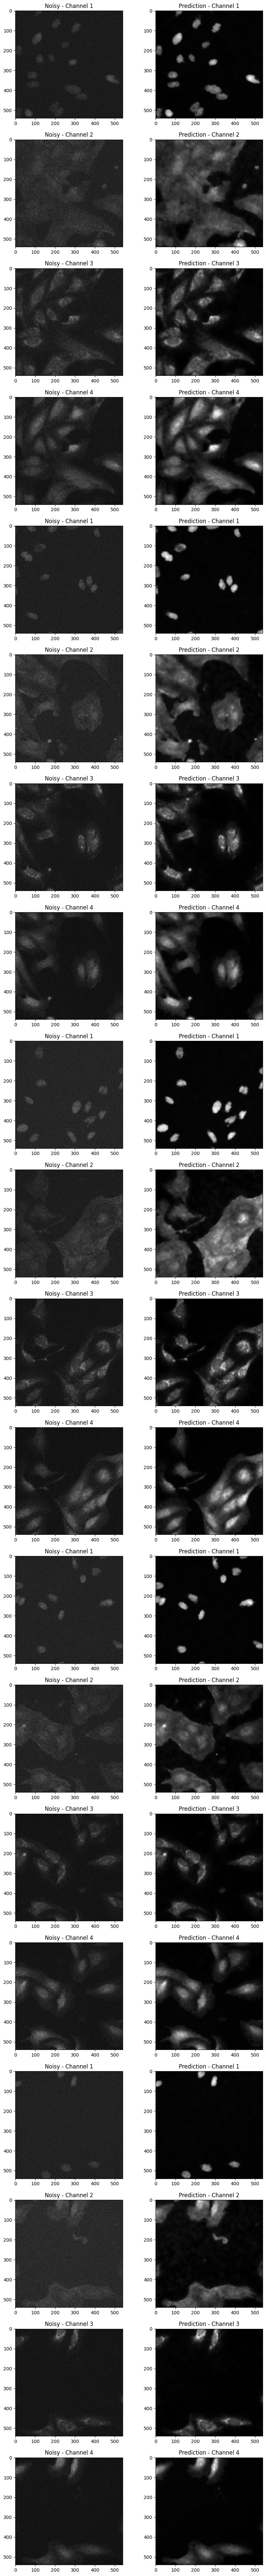

In [10]:
n = 5

fig, ax = plt.subplots(4 * n, 2, figsize=(10, 4 * n * 5))
for i in range(n):
    row = 4 * i

    # channel 1
    ax[row, 0].imshow(train_image[i, 0], cmap="gray")
    ax[row, 0].set_title("Noisy - Channel 1")
    ax[row, 1].imshow(prediction[i].squeeze()[0], cmap="gray")
    ax[row, 1].set_title("Prediction - Channel 1")

    # channel 2
    ax[row + 1, 0].imshow(train_image[i, 1], cmap="gray")
    ax[row + 1, 0].set_title("Noisy - Channel 2")
    ax[row + 1, 1].imshow(prediction[i].squeeze()[1], cmap="gray")
    ax[row + 1, 1].set_title("Prediction - Channel 2")

    # channel 3
    ax[row + 2, 0].imshow(train_image[i, 2], cmap="gray")
    ax[row + 2, 0].set_title("Noisy - Channel 3")
    ax[row + 2, 1].imshow(prediction[i].squeeze()[2], cmap="gray")
    ax[row + 2, 1].set_title("Prediction - Channel 3")

    # channel 4
    ax[row + 3, 0].imshow(train_image[i, 3], cmap="gray")
    ax[row + 3, 0].set_title("Noisy - Channel 4")
    ax[row + 3, 1].imshow(prediction[i].squeeze()[3], cmap="gray")
    ax[row + 3, 1].set_title("Prediction - Channel 4")

## Create cover

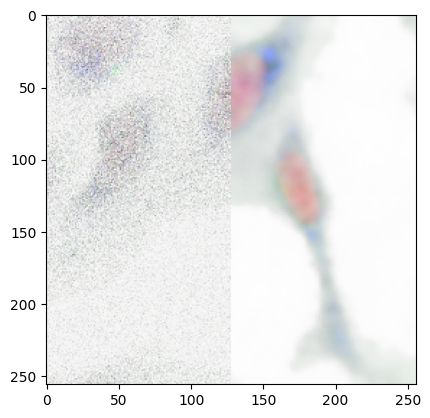

In [11]:
# create a cover image
im_idx = 9
cv_image_noisy = train_image[im_idx]
cv_image_pred = prediction[im_idx].squeeze()

# create image
cover = np.zeros((4, 256, 256))
(_, height, width) = cv_image_noisy.shape
assert height > 256
assert width > 256

# get min and max and reshape them so that they can be broadcasted with the images
noise_min = np.array(np.min(cv_image_noisy, axis=(1, 2)))[
    (..., *[np.newaxis] * (cv_image_noisy.ndim - 1))
]
noise_max = np.array(np.max(cv_image_noisy, axis=(1, 2)))[
    (..., *[np.newaxis] * (cv_image_noisy.ndim - 1))
]
pred_min = np.array(np.min(cv_image_pred, axis=(1, 2)))[
    (..., *[np.newaxis] * (cv_image_pred.ndim - 1))
]
pred_max = np.array(np.max(cv_image_pred, axis=(1, 2)))[
    (..., *[np.newaxis] * (cv_image_pred.ndim - 1))
]

# normalize train and prediction per channel
norm_noise = (cv_image_noisy - noise_min) / (noise_max - noise_min)
norm_pred = (cv_image_pred - pred_min) / (pred_max - pred_min)

# fill in halves
cover[:, :, : 256 // 2] = norm_noise[
    :,
    height // 2 - 256 // 2 : height // 2 + 256 // 2,
    width // 2 - 256 // 2 : width // 2,
]
cover[:, :, 256 // 2 :] = norm_pred[
    :,
    height // 2 - 256 // 2 : height // 2 + 256 // 2,
    width // 2 : width // 2 + 256 // 2,
]

# move C axis at the end
cover = np.moveaxis(cover, 0, -1)

# plot the single image
plt.imshow(cover)

# save the image
plt.imsave("JUMP_N2V.jpeg", cover)